# Predicting Patient Health Condition Using Machine Learning and EDA

**Subtitle:**
A Data-Driven Approach to Support Early Diagnosis and Hospital Decision-Making

  **Presented by:** Vishnu Priya R M

**Abstract:**

This project applies Exploratory Data Analysis (EDA) and Machine Learning (ML) techniques to a healthcare dataset to predict patient health outcomes. After preprocessing and visualizing the data, several classification models were trained to predict test results based on features such as age, medical conditions, medications, and more. The outcome helps hospitals improve clinical decision-making and manage resources more efficiently.

**Problem Statement:**

Healthcare data is complex and often inconsistent. Predicting a patient’s health status is essential for timely diagnosis and treatment. Traditional methods may fall short due to the vast amount of data. This project aims to develop a machine learning model that uses patient history and clinical data to predict test results or health outcomes effectively.

**Objective:**
*   Perform EDA to understand and visualize patient data

*   Preprocess and encode categorical data

*   Select relevant features for prediction

*   Train and evaluate multiple ML models

*   Interpret results to provide healthcare insights







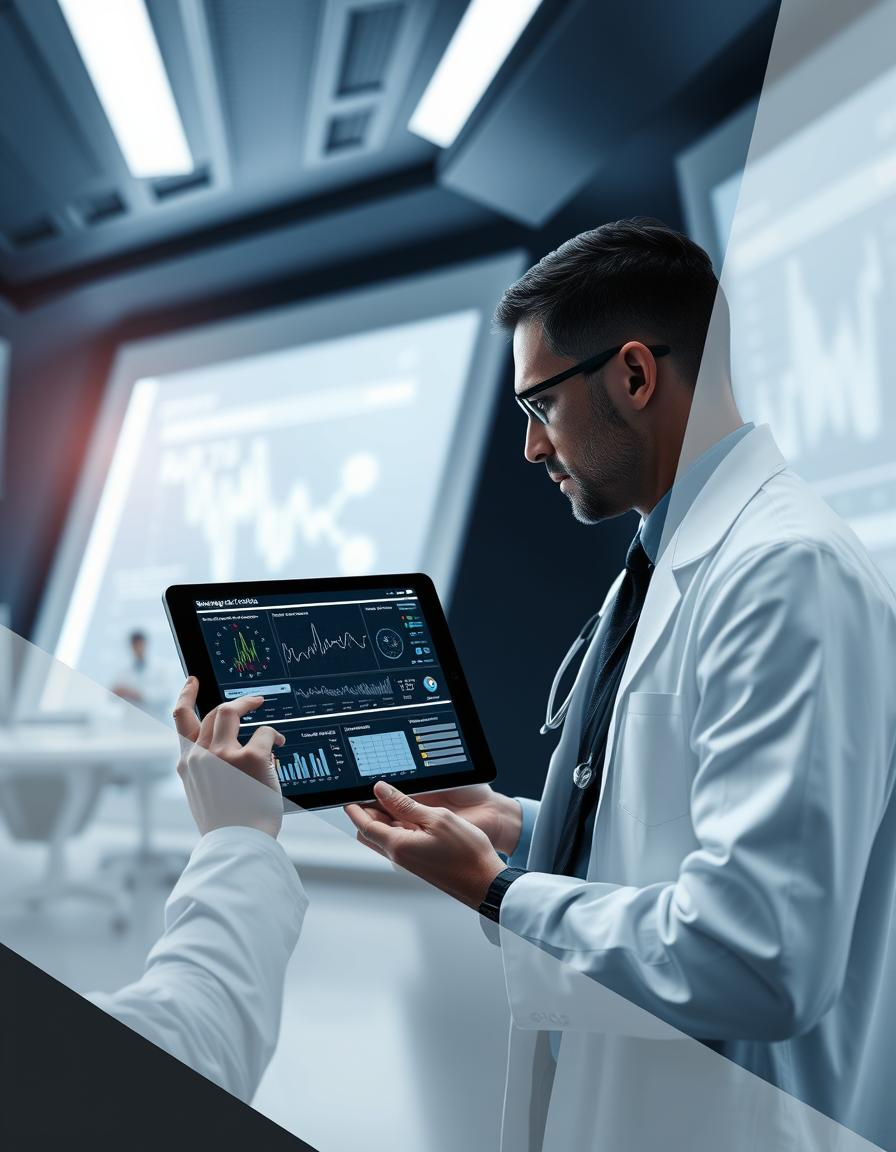

#Import Libraries and Load Data

Load the dataset using pandas and preview the first few rows to understand the structure.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('healthcare_dataset.csv')

In [40]:
df = pd.DataFrame(data)

In [41]:
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

#Initial Data Exploration

Inspect data types, look for null values or duplicates, and understand the basic statistics.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [43]:
df.shape

(55500, 15)

In [44]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [45]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [46]:
df.isnull()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [48]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
55495,False
55496,False
55497,False
55498,False


In [49]:
df.head(20)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


#Data Preprocessing

Categorical values are converted to numerical formats using LabelEncoder and OneHotEncoder, which is essential for ML models.

Label Encoder Test Results :

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Test_Encoded'] = encoder.fit_transform(df['Test Results'])
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

In [51]:
df = df.drop(['Test Results'], axis=1)
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

One-Hot Encoder Gender :

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [54]:
df['Gender_Male'] = df['Gender_Male'].astype(int)
print(df)

                    Name  Age Blood Type Medical Condition Date of Admission  \
0          Bobby JacksOn   30         B-            Cancer        2024-01-31   
1           LesLie TErRy   62         A+           Obesity        2019-08-20   
2            DaNnY sMitH   76         A-           Obesity        2022-09-22   
3           andrEw waTtS   28         O+          Diabetes        2020-11-18   
4          adrIENNE bEll   43        AB+            Cancer        2022-09-19   
...                  ...  ...        ...               ...               ...   
55495  eLIZABeTH jaCkSOn   42         O+            Asthma        2020-08-16   
55496         KYle pEREz   61        AB-           Obesity        2020-01-23   
55497       HEATher WaNG   38         B+      Hypertension        2020-07-13   
55498     JENniFER JOneS   43         O-         Arthritis        2019-05-25   
55499       jAMES GARCiA   53         O+         Arthritis        2024-04-02   

                 Doctor                

In [55]:
print(df.columns)

Index(['Name', 'Age', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test_Encoded', 'Gender_Male'],
      dtype='object')


 Label Encoder Other Categorical Columns :

In [56]:
label_encoder = LabelEncoder()
categorical_columns = ['Blood Type', 'Medical Condition','Admission Type','Medication']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
print(df)

                    Name  Age  Blood Type  Medical Condition  \
0          Bobby JacksOn   30           5                  2   
1           LesLie TErRy   62           0                  5   
2            DaNnY sMitH   76           1                  5   
3           andrEw waTtS   28           6                  3   
4          adrIENNE bEll   43           2                  2   
...                  ...  ...         ...                ...   
55495  eLIZABeTH jaCkSOn   42           6                  1   
55496         KYle pEREz   61           3                  5   
55497       HEATher WaNG   38           4                  4   
55498     JENniFER JOneS   43           7                  0   
55499       jAMES GARCiA   53           6                  0   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1            2019-08-20   Samantha Davies                       Kim Inc   
2     

#Exploratory Data Analysis (EDA)

These visualizations help us understand data patterns, correlations, distributions, and detect outliers.



#Outlier Detection

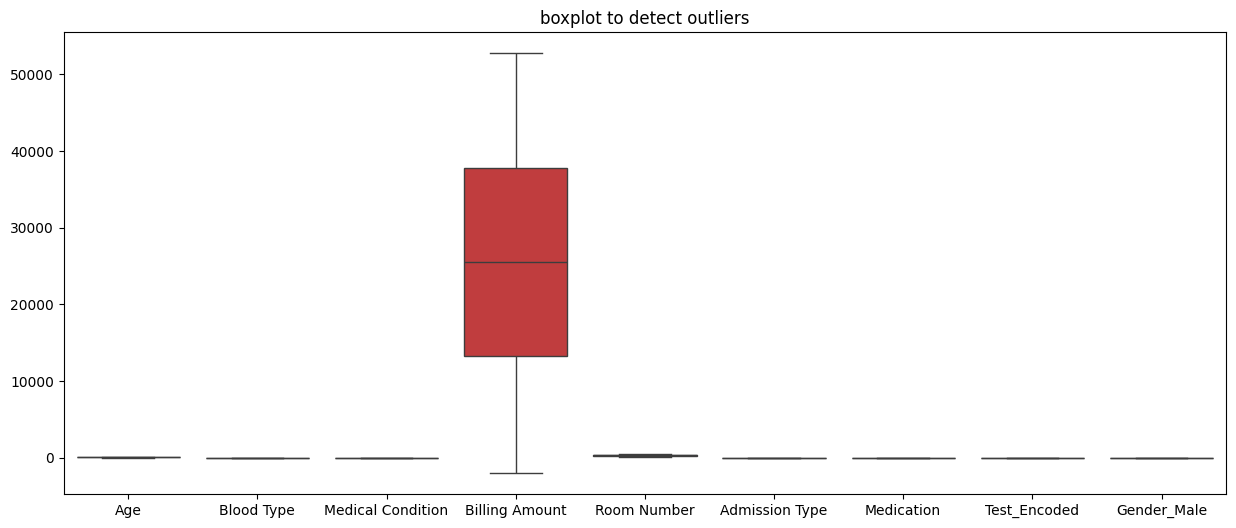

In [57]:
num_cols=df.select_dtypes(include='number')
plt.figure(figsize=(15,6))
sns.boxplot(data=num_cols)
plt.title("boxplot to detect outliers")
plt.show()

#Skewness Detection

Skewness measures the asymmetry of the data distribution.


*   A skewness value close to 0 means the data is fairly symmetrical (normal distribution).
*   A positive skew ( > 0 ) indicates a long tail on the right.

*   A negative skew ( < 0 ) indicates a long tail on the left





In [58]:
skewness=num_cols.skew()
print(skewness)

Age                 -0.005735
Blood Type           0.003384
Medical Condition   -0.001557
Billing Amount      -0.000978
Room Number         -0.011200
Admission Type       0.002623
Medication           0.002446
Test_Encoded         0.003648
Gender_Male         -0.001730
dtype: float64


In [59]:
print(df.columns)

Index(['Name', 'Age', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test_Encoded', 'Gender_Male'],
      dtype='object')


#Correlation Heatmap

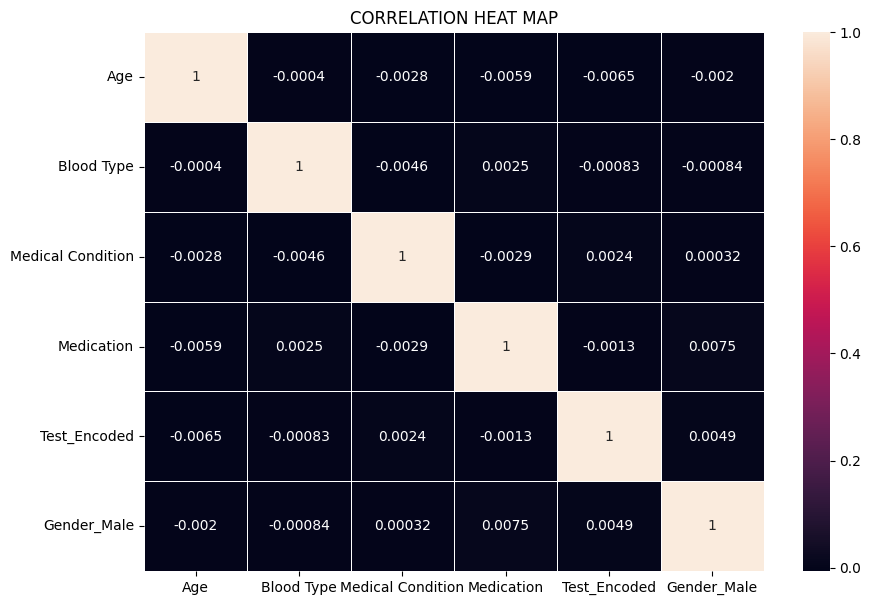

In [60]:
colss_1=['Age', 'Blood Type', 'Medical Condition','Medication','Test_Encoded','Gender_Male']
heat=df[colss_1].corr()
plt.figure(figsize=(10,7))
sns.heatmap(heat,annot=True,linewidth=0.5)
plt.title("CORRELATION HEAT MAP")
plt.show()

#Histogram & KDE

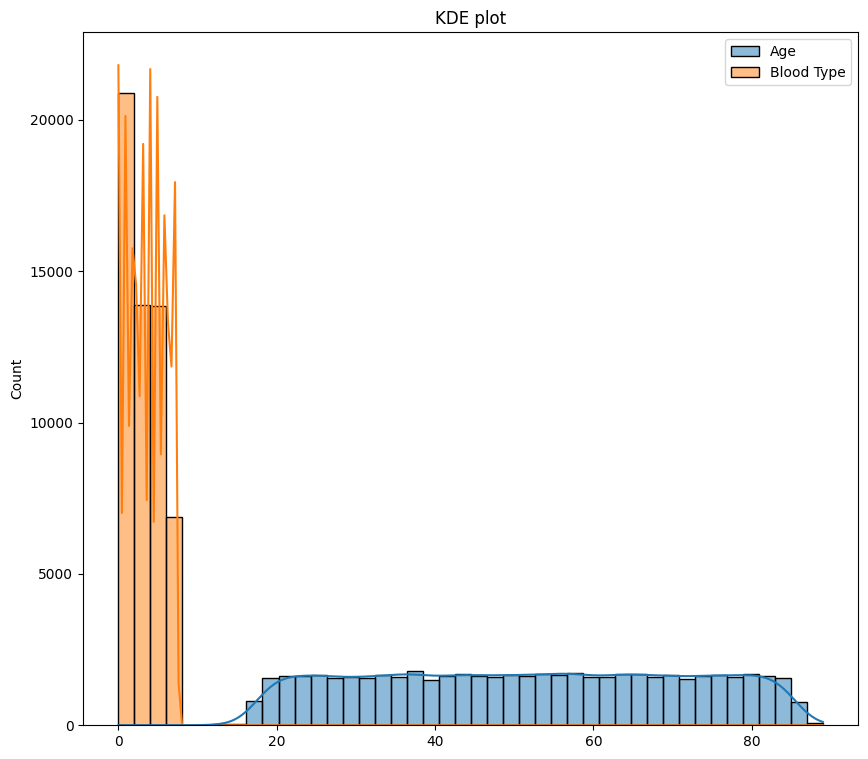

In [61]:
colss_2=['Age','Blood Type']
plt.figure(figsize=(10,9))
sns.histplot(df[colss_2],kde=True,fill=True,color='orange')
plt.title("KDE plot")
plt.show()

#scatter plot


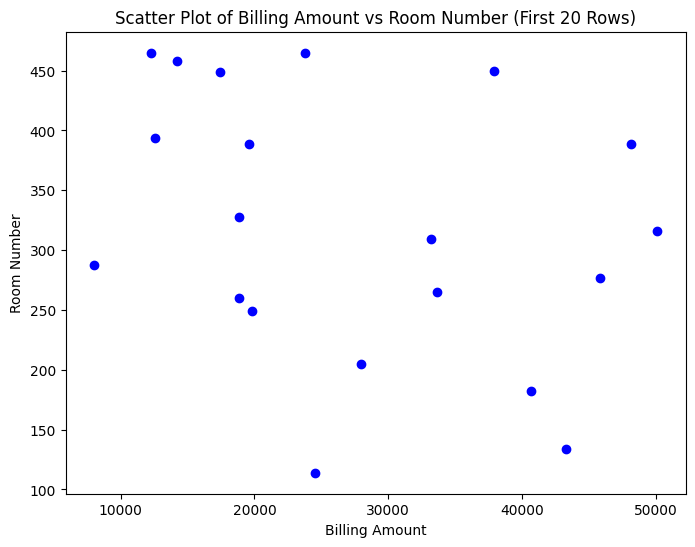

In [62]:
df_first_20 = df.head(20)
plt.figure(figsize=(8, 6))
plt.scatter(df_first_20['Billing Amount'], df_first_20['Room Number'], color='blue', marker='o')
plt.title('Scatter Plot of Billing Amount vs Room Number (First 20 Rows)')
plt.xlabel('Billing Amount')
plt.ylabel('Room Number')
plt.show()

#violinplot


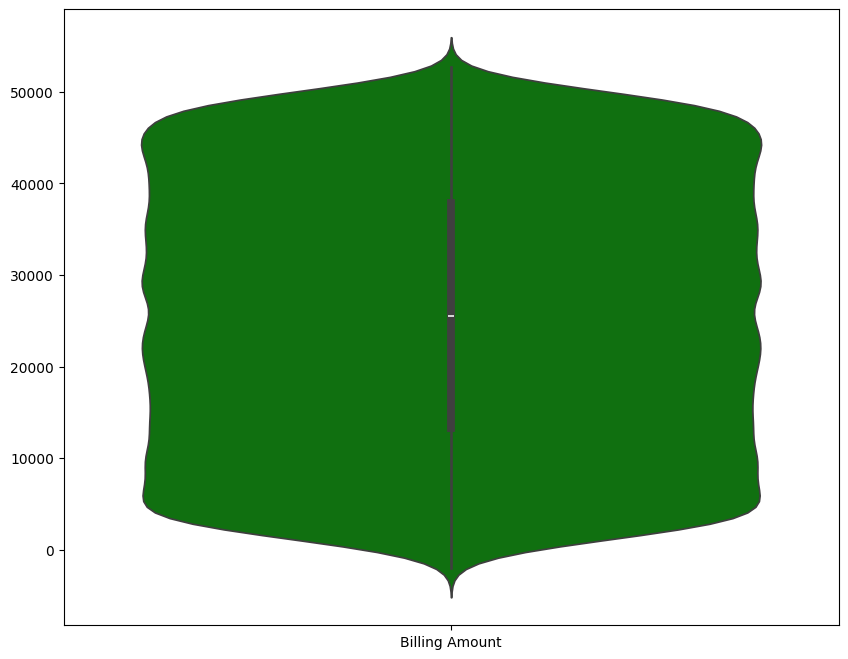

In [63]:
vi=['Billing Amount']
plt.figure(figsize=(10,8))
sns.violinplot(df[vi],color="green")
plt.show()

#Pie Chart for Medical Conditions


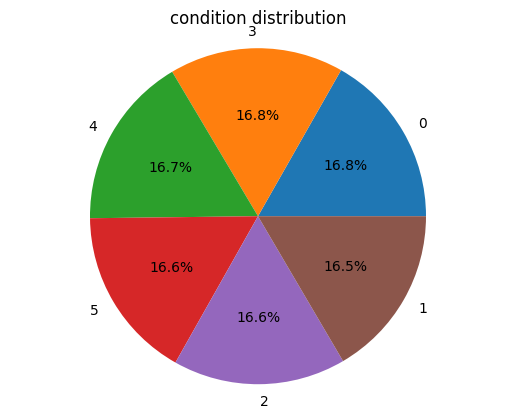

In [64]:
condition_counts=df['Medical Condition'].value_counts()
plt.pie(condition_counts,labels=condition_counts.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title('condition distribution')
plt.show()

#Feature Selection

Use SelectKBest with ANOVA F-test to keep the top 15 most relevant features for prediction.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Name', 'Date of Admission','Doctor', 'Hospital', 'Insurance Provider','Discharge Date','Test_Encoded'])
y = df['Test_Encoded']
selector = SelectKBest(score_func=f_classif, k=15)

In [66]:
df.isnull()

,Name,Age,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test_Encoded,Gender_Male
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df = df.fillna(0)
X = df.drop(columns=['Name', 'Date of Admission','Doctor', 'Hospital', 'Insurance Provider','Discharge Date','Test_Encoded'])
y = df['Test_Encoded']
selector = SelectKBest(score_func=f_classif, k=15)


In [68]:
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
features_score = pd.DataFrame({'features': X.columns, 'selected': selector.get_support()})
print(selected_features)
print(features_score)

Index(['Age', 'Blood Type', 'Medical Condition', 'Billing Amount',
       'Room Number', 'Admission Type', 'Medication', 'Gender_Male'],
      dtype='object')
            features  selected
0                Age      True
1         Blood Type      True
2  Medical Condition      True
3     Billing Amount      True
4        Room Number      True
5     Admission Type      True
6         Medication      True
7        Gender_Male      True


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=8. All the features will be returned.
  warnings.warn(


#Train-Test Split and Scaling

Data is split for training/testing, and then standardized to improve ML model performance.



In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.3, random_state=42)

In [70]:
Ss=StandardScaler()
X_test_scaled=Ss.fit_transform(X_test)
X_train_scaled=Ss.fit_transform(X_train)
print("Scaled Training Data:")
print(X_train_scaled[:5])
print("Scaled Testing Data:")
print(X_test_scaled[:5])

Scaled Training Data:
[[-7.41474705e-01  2.22688195e-01 -2.97996293e-01 -3.88114957e-01
  -1.23630208e+00  7.16138112e-03 -7.08080775e-01 -1.00226769e+00]
 [ 1.76724045e-01  6.60181817e-01 -2.97996293e-01  1.71043643e+00
   1.38709029e+00  1.22742303e+00 -7.08080775e-01 -1.00226769e+00]
 [ 7.37845503e-01 -1.08979267e+00  2.88218502e-01  8.21542115e-01
   1.27416281e+00  1.22742303e+00 -1.41499700e+00  9.97737437e-01]
 [-7.83311638e-02  2.22688195e-01 -8.84211088e-01 -6.57532498e-01
   5.79224429e-01  1.22742303e+00 -1.16454668e-03 -1.00226769e+00]
 [-7.92485747e-01 -1.52728629e+00  2.88218502e-01  1.00558615e+00
  -1.07994095e+00 -1.21310027e+00  1.41266791e+00  9.97737437e-01]]
Scaled Testing Data:
[[ 0.2781478   1.08910738  0.30533875 -1.54956755  0.33150882 -1.23361376
  -1.41110561  1.0024053 ]
 [-0.02798731 -1.52092542  0.30533875  0.81136901  0.61715022 -0.01094163
   1.42575848 -0.99760048]
 [-1.60968533 -1.52092542 -0.8616279   1.33680792 -1.32174897 -1.23361376
   1.42575848  

#Model Training and Evaluation
  1.Logistic Regression: Baseline model.

  2.Decision Tree Classifier: Easy to interpret.

  3.Random Forest Classifier: Robust, reduces overfitting.

  4.K-Nearest Neighbors (KNN): Distance-based.

  5.Support Vector Machine (SVM): High-dimensional data.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'Random Forest':RandomForestClassifier(),
    'KNN':KNeighborsClassifier()
}

#Model Evaluation

Train five different classifiers and evaluate them using accuracy, confusion matrix, and F1-score from classification report.



In [73]:
for name,clf in classifiers.items():
  clf.fit(X_train_scaled,y_train)
  y_pred=clf.predict(X_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Accuracy of {name}:{accuracy}")
  print("/n Confusion matrix:")
  print(confusion_matrix(y_test,y_pred))
  print("/n Classification report")
  print(classification_report(y_test,y_pred))

Accuracy of Logistic Regression:0.3302102102102102
/n Confusion matrix:
[[1598 2158 1887]
 [1605 2032 1781]
 [1632 2089 1868]]
/n Classification report
              precision    recall  f1-score   support

           0       0.33      0.28      0.31      5643
           1       0.32      0.38      0.35      5418
           2       0.34      0.33      0.34      5589

    accuracy                           0.33     16650
   macro avg       0.33      0.33      0.33     16650
weighted avg       0.33      0.33      0.33     16650

Accuracy of Decision Tree:0.3917117117117117
/n Confusion matrix:
[[2224 1767 1652]
 [1650 2160 1608]
 [1723 1728 2138]]
/n Classification report
              precision    recall  f1-score   support

           0       0.40      0.39      0.40      5643
           1       0.38      0.40      0.39      5418
           2       0.40      0.38      0.39      5589

    accuracy                           0.39     16650
   macro avg       0.39      0.39      0.39     1

#Conclusion



*   ML models can effectively predict test results using healthcare data.

*   Models like Random Forest and SVM usually perform better for classification problems.
*   Feature selection and scaling significantly boost performance.


*   This approach can support hospitals in early diagnosis, cost control, and resource optimization.



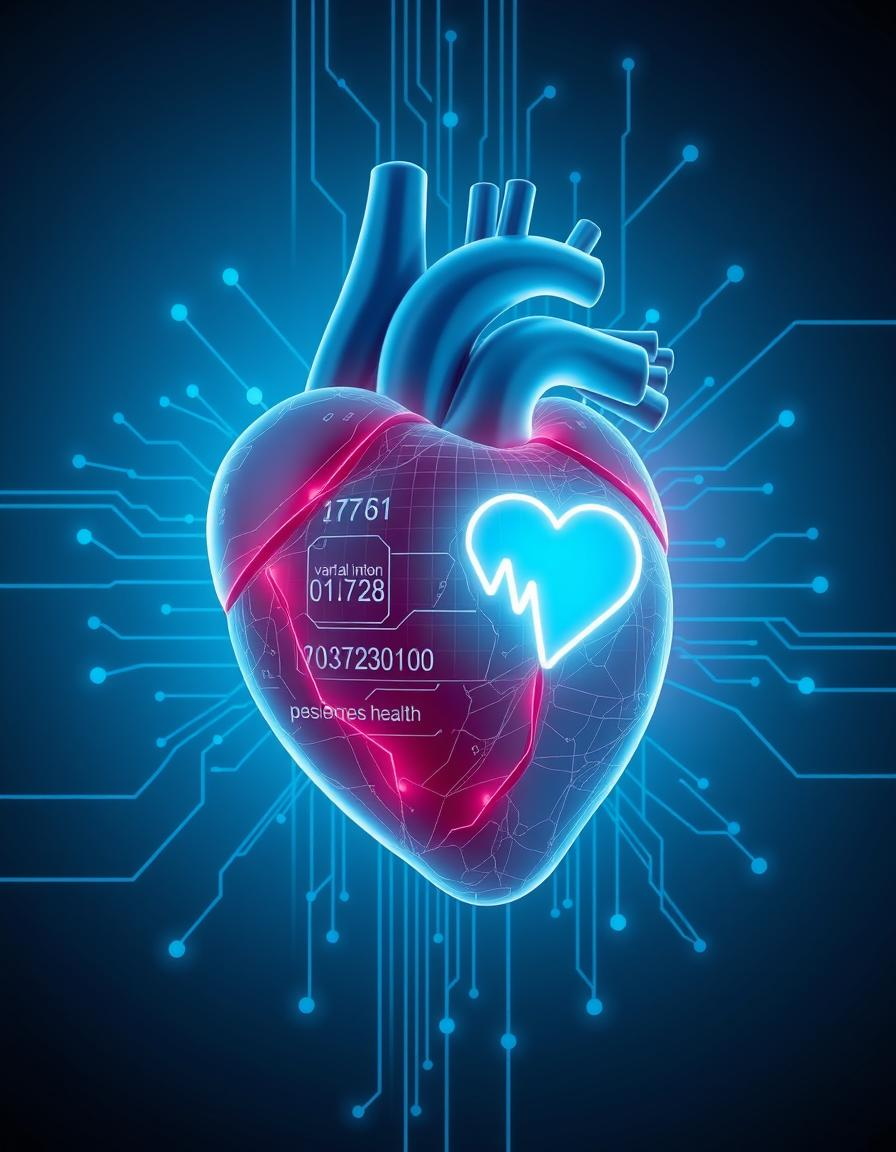